# Preparation

I collected this data in 2018 using a web scraper written in R -- the code is in [this repository](https://github.com/Aurathic/USNews-Colleges-Web-Scraper). The data is spread out across multiple tabs.

In [113]:
import numpy as np, pandas as pd, seaborn as sns
# install openpyxl as well

In [146]:
# Load data
df_dict = pd.read_excel("final_table_file_3.xlsx", None)
#df_dict

In [147]:
df_dict.keys()

dict_keys(['Overview', 'Indicators', 'Rankings', 'Paying', 'Academics', 'Student_Life', 'Services'])

Looking at the sheet, we can see many columns which we can discard:

In [148]:
df_dict['Paying'].drop(['Go.to.this.school.s.net.price.calculator.', 'Financial.aid.statistics.'], axis=1, inplace=True)

In [149]:
student_life_col_rem = df_dict['Student_Life'].filter(regex='[^.]$').columns.tolist()[3:]
df_dict['Student_Life'].drop(student_life_col_rem, axis=1, inplace=True)

In [150]:
# Add label to ranks
df_dict['Rankings'] = df_dict['Rankings'].add_suffix('.rank').enrollment
df_dict['Rankings'].head()

,name.rank,national.universities.rank,undergraduate.teaching.rank,best.value.rank,high.school.counselor.rank,innovative.rank,engineering.doctorate.rank,engineering.doctorate.chemical.rank,engineering.doctorate.computer.rank,business.overall.rank,...,business.accounting.rank,business.insurance.risk.rank,business.international.rank,business.marketing.rank,business.real.estate.rank,engineering.doctorate.biological.agricultural.rank,top.public.rank,engineering.doctorate.petroleum.rank,engineering.overall.rank,hbcu.rank
0,Princeton University,#1,#1,#1,#1,#15,#12,#11,#12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harvard University,#2,#34,#2,#1,#14,#24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Columbia University,#3,#34,#6,#6,NaN,#18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Massachusetts Institute of Technology,#3,#52,#3,#1,#3,#1,#1,#2,#2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,University of Chicago,#3,#16,#16,#12,#18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Biola University,#157,NaN,NaN,#237,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,Missouri University of Science & Technology,#157,NaN,NaN,#87,NaN,#67,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,#80,NaN,NaN,NaN
357,Oklahoma State University,#157,NaN,NaN,#129,NaN,#87,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,#80,NaN,NaN,NaN
358,University of Alabama--Birmingham,#157,NaN,NaN,#148,NaN,#132,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,#80,NaN,NaN,NaN


In [143]:
df = df_dict['Overview'][['name']].copy()
for v in df_dict.values():
    df = df.join(v, lsuffix="", rsuffix="!")
    # Remove the duplicated columsn from the columns
    df.drop(df.filter(regex='!$').columns.tolist(),axis=1, inplace=True)
df.head()

,name,location,Tuition...Fees,Room.and.Board,Total.Enrollment,Application.Deadline,school.type,year.founded,religious.affiliation,academic.calendar,...,cooperative.housing.,other.housing.options.,wellness.housing.,special.housing.for.international.students.,Campus.size..acres..,Students.who.have.cars.on.campus.,Alcohol.permitted.on.campus.for.students.of.legal.age.,On.campus.library.,Museums.or.special.academic.buildings.on.campus.,Accessibility.of.campus.to.physically.disabled.students.
0,Princeton University,"Princeton, NJ","$47,140 (2018-19)","$15,610 (2018-19)","8,273",Jan. 1,"Private, Coed",1746.0,None,Semester,...,NaN,NaN,NaN,NaN,600,NaN,Yes,Yes,"Art Museum with Permanent Collection, Museum o...",Mostly
1,Harvard University,"Cambridge, MA","$50,420 (2018-19)","$17,160 (2018-19)","20,604",Jan. 1,"Private, Coed",1636.0,None,Semester,...,NaN,NaN,NaN,NaN,"5,076",NaN,Yes,Yes,NaN,Mostly
2,Columbia University,"New York, NY","$59,430 (2018-19)","$14,016 (2018-19)","25,968",Jan. 1,"Private, Coed",1754.0,None,Semester,...,NaN,NaN,NaN,NaN,36,NaN,Yes,Yes,The services and collections are organized int...,Mostly
3,Massachusetts Institute of Technology,"Cambridge, MA","$51,832 (2018-19)","$15,510 (2018-19)","11,466",Jan. 1,"Private, Coed",1861.0,None,4-1-4,...,1%,1%,NaN,NaN,166,NaN,Yes,Yes,Dedicated teaching laboratories in many depart...,Partly
4,University of Chicago,"Chicago, IL","$57,006 (2018-19)","$16,350 (2018-19)","13,736",Jan. 1,"Private, Coed",1890.0,None,Quarter,...,NaN,NaN,NaN,NaN,217,NaN,Yes,Yes,"Smart Museum (modern art), Oriental Institute,...",Mostly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Biola University,"La Mirada, CA","$40,488 (2018-19)","$11,312 (2018-19)","6,172",rolling,"Private, Coed",1908.0,Multiple Protestant Denomination,4-1-4,...,NaN,NaN,NaN,NaN,95,NaN,No,Yes,"media center, electron microscope, on-campus r...",Mostly
356,Missouri University of Science & Technology,"Rolla, MO",NaN,"$9,980 (2017-18)","8,884",July 1,"Public, Coed",1870.0,None,Semester,...,NaN,NaN,NaN,NaN,284,NaN,No,Yes,Student Design Competition Center (includes 9 ...,Mostly
357,Oklahoma State University,"Stillwater, OK",NaN,"$8,996 (2018-19)","25,254",rolling,"Public, Coed",1890.0,None,Semester,...,NaN,NaN,NaN,NaN,"1,489",NaN,Yes,Yes,"Oklahoma State University Museum of Art, Oklah...",Fully
358,University of Alabama--Birmingham,"Birmingham, AL",NaN,"$11,682 (2018-19)","20,902",rolling,"Public, Coed",1969.0,None,Semester,...,NaN,NaN,NaN,NaN,275,NaN,Yes,Yes,Alys Robinson Stephens Performing Arts Center;...,Fully


In [151]:
from pprint import pprint
pprint(list(df.columns)[::10]) # Show a sample of the columns

['name',
 'setting',
 'Classes.with.fewer.than.20.students.',
 'engineering.doctorate.chemical.rank',
 'engineering.doctorate.aerospace.aeronautical.astronautical.rank',
 'business.insurance.risk.rank',
 'Used.GI.Bill.benefits.to.partially.or.fully.finance.tuition.and.fees.',
 'X50.or.more',
 'Physical.Sciences',
 'Bioengineering.and.Biomedical.Engineering',
 'Multi..Interdisciplinary.Studies..Other',
 'Business.Administration.and.Management..General',
 'Business.Managerial.Economics',
 'Engineering.Technologies.and.Engineering.Related.Fields',
 'Family.and.Consumer.Sciences.Human.Sciences',
 'Biomedical.Sciences..General',
 'Philosophy.and.Religious.Studies',
 'Liberal.Arts.and.Sciences.Liberal.Studies',
 'Air.Force.ROTC.',
 'sorority.housing.',
 'Alcohol.permitted.on.campus.for.students.of.legal.age.']


In [120]:
len(df.columns)

232

In [112]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
348    False
349    False
353    False
356    False
359    False
Length: 285, dtype: bool

There are 360 entries in this file, sorted by US News' ranking order. However, there are also many duplicate rows. If we remove these:

In [119]:
df = df.loc[~df.duplicated()].copy()
df

,name,location,Tuition...Fees,Room.and.Board,Total.Enrollment,Application.Deadline,school.type,year.founded,religious.affiliation,academic.calendar,...,X2,X3,X1.1,and.10.more,Campus.size..acres..,Students.who.have.cars.on.campus.,Alcohol.permitted.on.campus.for.students.of.legal.age.,On.campus.library.,Museums.or.special.academic.buildings.on.campus.,Accessibility.of.campus.to.physically.disabled.students.
0,Princeton University,"Princeton, NJ","$47,140 (2018-19)","$15,610 (2018-19)","8,273",Jan. 1,"Private, Coed",1746.0,None,Semester,...,NaN,NaN,NaN,NaN,600,NaN,Yes,Yes,"Art Museum with Permanent Collection, Museum o...",Mostly
1,Harvard University,"Cambridge, MA","$50,420 (2018-19)","$17,160 (2018-19)","20,604",Jan. 1,"Private, Coed",1636.0,None,Semester,...,NaN,NaN,NaN,NaN,"5,076",NaN,Yes,Yes,NaN,Mostly
2,Columbia University,"New York, NY","$59,430 (2018-19)","$14,016 (2018-19)","25,968",Jan. 1,"Private, Coed",1754.0,None,Semester,...,NaN,NaN,NaN,NaN,36,NaN,Yes,Yes,The services and collections are organized int...,Mostly
3,Massachusetts Institute of Technology,"Cambridge, MA","$51,832 (2018-19)","$15,510 (2018-19)","11,466",Jan. 1,"Private, Coed",1861.0,None,4-1-4,...,NaN,NaN,NaN,NaN,166,NaN,Yes,Yes,Dedicated teaching laboratories in many depart...,Partly
4,University of Chicago,"Chicago, IL","$57,006 (2018-19)","$16,350 (2018-19)","13,736",Jan. 1,"Private, Coed",1890.0,None,Quarter,...,NaN,NaN,NaN,NaN,217,NaN,Yes,Yes,"Smart Museum (modern art), Oriental Institute,...",Mostly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Biola University,"La Mirada, CA","$40,488 (2018-19)","$11,312 (2018-19)","6,172",rolling,"Private, Coed",1908.0,Multiple Protestant Denomination,4-1-4,...,NaN,NaN,NaN,NaN,95,NaN,No,Yes,"media center, electron microscope, on-campus r...",Mostly
166,Missouri University of Science & Technology,"Rolla, MO",NaN,"$9,980 (2017-18)","8,884",July 1,"Public, Coed",1870.0,None,Semester,...,NaN,NaN,NaN,NaN,284,NaN,No,Yes,Student Design Competition Center (includes 9 ...,Mostly
167,Oklahoma State University,"Stillwater, OK",NaN,"$8,996 (2018-19)","25,254",rolling,"Public, Coed",1890.0,None,Semester,...,NaN,NaN,NaN,NaN,"1,489",NaN,Yes,Yes,"Oklahoma State University Museum of Art, Oklah...",Fully
168,University of Alabama--Birmingham,"Birmingham, AL",NaN,"$11,682 (2018-19)","20,902",rolling,"Public, Coed",1969.0,None,Semester,...,NaN,NaN,NaN,NaN,275,NaN,Yes,Yes,Alys Robinson Stephens Performing Arts Center;...,Fully


We see only 169 universities were collected. 

# Analysis

Let's start off with an analysis of application deadlines. 

In [104]:
set(df["Application.Deadline"])

{'April 1',
 'April 15',
 'Aug. 1',
 'Aug. 13',
 'Aug. 15',
 'Dec. 1',
 'Dec. 15',
 'Feb. 1',
 'Feb. 15',
 'Feb. 7',
 'Jan. 1',
 'Jan. 10',
 'Jan. 15',
 'Jan. 2',
 'Jan. 20',
 'Jan. 3',
 'Jan. 5',
 'July 1',
 'June 1',
 'March 1',
 'March 15',
 'May 1',
 'Nov. 15',
 'Nov. 30',
 'Sept. 1',
 'rolling'}

In [105]:
import dateutil.parser

def parseDate(x):
    try:
        return dateutil.parser.parse(x)
    except: #when date is "rolling"
        return np.nan

df["Application.Deadline.Date"] = df2["Application.Deadline"].map(parseDate)
df[["name","Application.Deadline.Date"]]

,name,Application.Deadline.Date
0,Princeton University,2021-01-01
1,Harvard University,2021-01-01
2,Columbia University,2021-01-01
3,Massachusetts Institute of Technology,2021-01-01
4,University of Chicago,2021-01-01
...,...,...
355,Biola University,NaT
356,Missouri University of Science & Technology,NaT
357,Oklahoma State University,NaT
358,University of Alabama--Birmingham,NaT


In [ ]:
By inspection, we can see there are a lot of NaT (Not a Time) values.

In [ ]:
s.isna().sum()

[Text(0.5, 0, 'Application Deadline'),
 Text(0.5, 1.0, 'Histogram of Application Dates')]

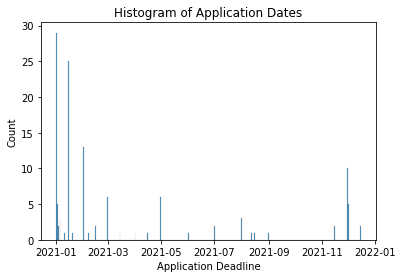

In [110]:
ax = sns.histplot(data=df, x="Application.Deadline.Date", bins=365)
ax.set(xlabel="Application Deadline", title="Histogram of Application Dates")

We can see almost all of the deadlines are in the beginning of the year, with 